In [1]:
# Import our dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

In [2]:
# Loading the dataset from the resources folder

sqf_2020_df = pd.read_csv(Path('Resources/sqf-2020.csv'))[['SUSPECT_ARRESTED_FLAG',
 'YEAR2',
 'OBSERVED_DURATION_MINUTES',
 'DAY2',
 'MONTH2',
 'SUSPECT_WEIGHT',
 'SUSPECT_HEIGHT',
 'SUSPECT_REPORTED_AGE',
 'STOP_DURATION_MINUTES',
 'STOP_FRISK_TIME',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y',
  'SUMMONS_ISSUED_FLAG']]
sqf_2019_df = pd.read_csv(Path('Resources/sqf-2019.csv'))
sqf_2018_df = pd.read_csv(Path('Resources/sqf-2018.csv'))
sqf_2017_df = pd.read_csv(Path('Resources/sqf-2017.csv'))

dataFrame_list = [sqf_2019_df, sqf_2018_df, sqf_2017_df]
merge_df = pd.concat(dataFrame_list)
merge_df = merge_df[['SUSPECT_ARRESTED_FLAG',
 'YEAR2',
 'OBSERVED_DURATION_MINUTES',
 'DAY2',
 'MONTH2',
 'SUSPECT_WEIGHT',
 'SUSPECT_HEIGHT',
 'SUSPECT_REPORTED_AGE',
 'STOP_DURATION_MINUTES',
 'STOP_FRISK_TIME',
  'Stop Frisk Time',                   
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y',
  'SUMMONS_ISSUED_FLAG']]

In [3]:
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG
0,N,2019.0,1.0,Wednesday,January,230,5.11,30,10.0,14:30:00,NaN,979667,199737,N
1,Y,2019.0,1.0,Tuesday,January,190,5.1,22,10.0,2:30:00,NaN,982650,201326,N
2,Y,2019.0,1.0,Saturday,January,250,5.9,56,4.0,16:54:00,NaN,984063,203033,N
3,N,2019.0,0.0,Monday,January,,,(null),5.0,21:21:00,NaN,982848,202677,N
4,Y,2019.0,1.0,Tuesday,January,150,5.9,21,5.0,18:50:00,NaN,983100,202705,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017.0,1.0,Friday,December,(null),#NULL!,22,10.0,12:20:00 PM,NaN,#NULL!,#NULL!,N
11625,N,2017.0,1.0,Wednesday,December,220,5.90,31,5.0,4:10:00 AM,NaN,1016693.00,187436.00,N
11626,Y,2017.0,2.0,Saturday,October,250,5.10,50,2.0,11:45:00 PM,NaN,#NULL!,#NULL!,N
11627,Y,2017.0,2.0,Tuesday,December,170,6.10,20,10.0,3:25:00 PM,NaN,#NULL!,#NULL!,N


In [4]:
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG
0,Y,2020,1,Wednesday,January,160,6.1,18,2,1:12:00,997094,222002,N
1,N,2020,1,Wednesday,January,180,6.2,18,5,1:11:00,997094,222002,N
2,N,2020,1,Wednesday,January,165,5.1,17,5,1:11:00,997094,222002,N
3,Y,2020,1,Wednesday,January,220,6,33,10,10:18:00,1018441,181412,N
4,N,2020,0,Wednesday,January,170,5.9,40,15,8:45:00,987763,182543,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180,5.5,22,10,0:20:00,979566,173464,N
9540,N,2020,1,Tuesday,December,200,6,48,6,17:11:00,1002918,181721,N
9541,Y,2020,1,Saturday,December,150,5.8,16,2,1:45:00,1010145,182898,N
9542,N,2020,0,Friday,December,170,6,60,5,15:45:00,1007368,189362,N


In [5]:
merge_df = merge_df.replace('PM','', regex=True)
merge_df = merge_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('AM','', regex=True)
sqf_2020_df = sqf_2020_df.replace('PM','', regex=True)
merge_df
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG
0,Y,2020,1,Wednesday,January,160,6.1,18,2,1:12:00,997094,222002,N
1,N,2020,1,Wednesday,January,180,6.2,18,5,1:11:00,997094,222002,N
2,N,2020,1,Wednesday,January,165,5.1,17,5,1:11:00,997094,222002,N
3,Y,2020,1,Wednesday,January,220,6,33,10,10:18:00,1018441,181412,N
4,N,2020,0,Wednesday,January,170,5.9,40,15,8:45:00,987763,182543,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180,5.5,22,10,0:20:00,979566,173464,N
9540,N,2020,1,Tuesday,December,200,6,48,6,17:11:00,1002918,181721,N
9541,Y,2020,1,Saturday,December,150,5.8,16,2,1:45:00,1010145,182898,N
9542,N,2020,0,Friday,December,170,6,60,5,15:45:00,1007368,189362,N


In [6]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column SUSPECT_ARRESTED_FLAG has 0 null values
Column YEAR2 has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column DAY2 has 0 null values
Column MONTH2 has 0 null values
Column SUSPECT_WEIGHT has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column STOP_FRISK_TIME has 11013 null values
Column Stop Frisk Time has 25090 null values
Column STOP_LOCATION_X has 0 null values
Column STOP_LOCATION_Y has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values


In [7]:
# Function checking for missing values
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(merge_df)

Your selected dataframe has 14 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Stop Frisk Time,25090,69.5
STOP_FRISK_TIME,11013,30.5


In [9]:
merge_df.dtypes

SUSPECT_ARRESTED_FLAG         object
YEAR2                        float64
OBSERVED_DURATION_MINUTES    float64
DAY2                          object
MONTH2                        object
SUSPECT_WEIGHT                object
SUSPECT_HEIGHT                object
SUSPECT_REPORTED_AGE          object
STOP_DURATION_MINUTES        float64
STOP_FRISK_TIME               object
Stop Frisk Time               object
STOP_LOCATION_X               object
STOP_LOCATION_Y               object
SUMMONS_ISSUED_FLAG           object
dtype: object

In [10]:
# Generate our categorical variable lists
float_columns = merge_df.dtypes[merge_df.dtypes == "float"].index.tolist()
len(float_columns)

3

In [11]:
# Check the number of unique values in each column
merge_df[float_columns]

,YEAR2,OBSERVED_DURATION_MINUTES,STOP_DURATION_MINUTES
0,2019.0,1.0,10.0
1,2019.0,1.0,10.0
2,2019.0,1.0,4.0
3,2019.0,0.0,5.0
4,2019.0,1.0,5.0
...,...,...,...
11624,2017.0,1.0,10.0
11625,2017.0,1.0,5.0
11626,2017.0,2.0,2.0
11627,2017.0,2.0,10.0


In [12]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

11

In [13]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

SUSPECT_ARRESTED_FLAG        2
DAY2                         7
MONTH2                      12
SUSPECT_WEIGHT             205
SUSPECT_HEIGHT              80
SUSPECT_REPORTED_AGE        84
STOP_FRISK_TIME           2110
Stop Frisk Time           1342
STOP_LOCATION_X          19065
STOP_LOCATION_Y          19943
SUMMONS_ISSUED_FLAG          3
dtype: int64

In [14]:
# Finding the value_counts of each column
for c in merge_df.columns:
    print("---- %s ---" % c)
    print(merge_df[c].value_counts())

---- SUSPECT_ARRESTED_FLAG ---
N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64
---- YEAR2 ---
2019.0    13459
2017.0    11629
2018.0    11008
Name: YEAR2, dtype: int64
---- OBSERVED_DURATION_MINUTES ---
1.0       21924
2.0        4430
0.0        4188
5.0        2309
3.0        1171
          ...  
500.0         1
516.0         1
1102.0        1
1442.0        1
1535.0        1
Name: OBSERVED_DURATION_MINUTES, Length: 201, dtype: int64
---- DAY2 ---
Saturday     5745
Wednesday    5584
Thursday     5458
Friday       5435
Tuesday      5240
Sunday       4555
Monday       4079
Name: DAY2, dtype: int64
---- MONTH2 ---
March        3437
April        3373
May          3371
June         3134
July         3058
January      3051
October      3004
August       2978
February     2878
September    2802
November     2668
December     2342
Name: MONTH2, dtype: int64
---- SUSPECT_WEIGHT ---
150    4664
160    4317
180    3758
170    2879
140    2504
       ... 
13        1
127       1
96

In [15]:
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG
0,Y,2020,1,Wednesday,January,160,6.1,18,2,1:12:00,997094,222002,N
1,N,2020,1,Wednesday,January,180,6.2,18,5,1:11:00,997094,222002,N
2,N,2020,1,Wednesday,January,165,5.1,17,5,1:11:00,997094,222002,N
3,Y,2020,1,Wednesday,January,220,6,33,10,10:18:00,1018441,181412,N
4,N,2020,0,Wednesday,January,170,5.9,40,15,8:45:00,987763,182543,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180,5.5,22,10,0:20:00,979566,173464,N
9540,N,2020,1,Tuesday,December,200,6,48,6,17:11:00,1002918,181721,N
9541,Y,2020,1,Saturday,December,150,5.8,16,2,1:45:00,1010145,182898,N
9542,N,2020,0,Friday,December,170,6,60,5,15:45:00,1007368,189362,N


In [16]:
# Drop the null columns where all values are null
sqf_2020_df = sqf_2020_df.dropna(axis='columns', how='all')
merge_df = merge_df.dropna(axis='columns', how='all')
merge_df
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG
0,Y,2020,1,Wednesday,January,160,6.1,18,2,1:12:00,997094,222002,N
1,N,2020,1,Wednesday,January,180,6.2,18,5,1:11:00,997094,222002,N
2,N,2020,1,Wednesday,January,165,5.1,17,5,1:11:00,997094,222002,N
3,Y,2020,1,Wednesday,January,220,6,33,10,10:18:00,1018441,181412,N
4,N,2020,0,Wednesday,January,170,5.9,40,15,8:45:00,987763,182543,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180,5.5,22,10,0:20:00,979566,173464,N
9540,N,2020,1,Tuesday,December,200,6,48,6,17:11:00,1002918,181721,N
9541,Y,2020,1,Saturday,December,150,5.8,16,2,1:45:00,1010145,182898,N
9542,N,2020,0,Friday,December,170,6,60,5,15:45:00,1007368,189362,N


In [17]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SUSPECT_ARRESTED_FLAG      36096 non-null  object 
 1   YEAR2                      36096 non-null  float64
 2   OBSERVED_DURATION_MINUTES  36096 non-null  float64
 3   DAY2                       36096 non-null  object 
 4   MONTH2                     36096 non-null  object 
 5   SUSPECT_WEIGHT             36096 non-null  object 
 6   SUSPECT_HEIGHT             36096 non-null  object 
 7   SUSPECT_REPORTED_AGE       36096 non-null  object 
 8   STOP_DURATION_MINUTES      36096 non-null  float64
 9   STOP_FRISK_TIME            25083 non-null  object 
 10  Stop Frisk Time            11006 non-null  object 
 11  STOP_LOCATION_X            36096 non-null  object 
 12  STOP_LOCATION_Y            36096 non-null  object 
 13  SUMMONS_ISSUED_FLAG        36096 non-null  obj

In [18]:
# Convert time into seconds
sqf_2020_df["TIME"] = sqf_2020_df["STOP_FRISK_TIME"].astype(str) 
merge_df["TIME"] = merge_df["STOP_FRISK_TIME"].astype(str) + merge_df["Stop Frisk Time"].astype(str)
merge_df["TIME"]

0         14:30:00nan
1          2:30:00nan
2         16:54:00nan
3         21:21:00nan
4         18:50:00nan
             ...     
11624    12:20:00 nan
11625     4:10:00 nan
11626    11:45:00 nan
11627     3:25:00 nan
11628    10:55:00 nan
Name: TIME, Length: 36096, dtype: object

In [19]:
sqf_2020_df['TIME'] = pd.to_timedelta(sqf_2020_df['TIME'])
sqf_2020_df['SECONDS'] = sqf_2020_df['TIME'].dt.total_seconds()
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME,SECONDS
0,Y,2020,1,Wednesday,January,160,6.1,18,2,1:12:00,997094,222002,N,01:12:00,4320.0
1,N,2020,1,Wednesday,January,180,6.2,18,5,1:11:00,997094,222002,N,01:11:00,4260.0
2,N,2020,1,Wednesday,January,165,5.1,17,5,1:11:00,997094,222002,N,01:11:00,4260.0
3,Y,2020,1,Wednesday,January,220,6,33,10,10:18:00,1018441,181412,N,10:18:00,37080.0
4,N,2020,0,Wednesday,January,170,5.9,40,15,8:45:00,987763,182543,N,08:45:00,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180,5.5,22,10,0:20:00,979566,173464,N,00:20:00,1200.0
9540,N,2020,1,Tuesday,December,200,6,48,6,17:11:00,1002918,181721,N,17:11:00,61860.0
9541,Y,2020,1,Saturday,December,150,5.8,16,2,1:45:00,1010145,182898,N,01:45:00,6300.0
9542,N,2020,0,Friday,December,170,6,60,5,15:45:00,1007368,189362,N,15:45:00,56700.0


In [20]:
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME
0,N,2019.0,1.0,Wednesday,January,230,5.11,30,10.0,14:30:00,NaN,979667,199737,N,14:30:00nan
1,Y,2019.0,1.0,Tuesday,January,190,5.1,22,10.0,2:30:00,NaN,982650,201326,N,2:30:00nan
2,Y,2019.0,1.0,Saturday,January,250,5.9,56,4.0,16:54:00,NaN,984063,203033,N,16:54:00nan
3,N,2019.0,0.0,Monday,January,,,(null),5.0,21:21:00,NaN,982848,202677,N,21:21:00nan
4,Y,2019.0,1.0,Tuesday,January,150,5.9,21,5.0,18:50:00,NaN,983100,202705,N,18:50:00nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017.0,1.0,Friday,December,(null),#NULL!,22,10.0,12:20:00,NaN,#NULL!,#NULL!,N,12:20:00 nan
11625,N,2017.0,1.0,Wednesday,December,220,5.90,31,5.0,4:10:00,NaN,1016693.00,187436.00,N,4:10:00 nan
11626,Y,2017.0,2.0,Saturday,October,250,5.10,50,2.0,11:45:00,NaN,#NULL!,#NULL!,N,11:45:00 nan
11627,Y,2017.0,2.0,Tuesday,December,170,6.10,20,10.0,3:25:00,NaN,#NULL!,#NULL!,N,3:25:00 nan


In [21]:
# Removing nan next to time
merge_df['TIME'] = merge_df['TIME'].replace('nan','', regex=True)
merge_df['TIME']

0         14:30:00
1          2:30:00
2         16:54:00
3         21:21:00
4         18:50:00
           ...    
11624    12:20:00 
11625     4:10:00 
11626    11:45:00 
11627     3:25:00 
11628    10:55:00 
Name: TIME, Length: 36096, dtype: object

In [22]:
merge_df['TIME'] = pd.to_timedelta(merge_df['TIME'])
merge_df['SECONDS'] = merge_df['TIME'].dt.total_seconds()

In [23]:
merge_df['SECONDS']

0        52200.0
1         9000.0
2        60840.0
3        76860.0
4        67800.0
          ...   
11624    44400.0
11625    15000.0
11626    42300.0
11627    12300.0
11628    39300.0
Name: SECONDS, Length: 36096, dtype: float64

In [24]:
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR2,OBSERVED_DURATION_MINUTES,DAY2,MONTH2,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME,SECONDS
0,N,2019.0,1.0,Wednesday,January,230,5.11,30,10.0,14:30:00,NaN,979667,199737,N,14:30:00,52200.0
1,Y,2019.0,1.0,Tuesday,January,190,5.1,22,10.0,2:30:00,NaN,982650,201326,N,02:30:00,9000.0
2,Y,2019.0,1.0,Saturday,January,250,5.9,56,4.0,16:54:00,NaN,984063,203033,N,16:54:00,60840.0
3,N,2019.0,0.0,Monday,January,,,(null),5.0,21:21:00,NaN,982848,202677,N,21:21:00,76860.0
4,Y,2019.0,1.0,Tuesday,January,150,5.9,21,5.0,18:50:00,NaN,983100,202705,N,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017.0,1.0,Friday,December,(null),#NULL!,22,10.0,12:20:00,NaN,#NULL!,#NULL!,N,12:20:00,44400.0
11625,N,2017.0,1.0,Wednesday,December,220,5.90,31,5.0,4:10:00,NaN,1016693.00,187436.00,N,04:10:00,15000.0
11626,Y,2017.0,2.0,Saturday,October,250,5.10,50,2.0,11:45:00,NaN,#NULL!,#NULL!,N,11:45:00,42300.0
11627,Y,2017.0,2.0,Tuesday,December,170,6.10,20,10.0,3:25:00,NaN,#NULL!,#NULL!,N,03:25:00,12300.0


In [25]:
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y']

0       222002
1       222002
2       222002
3       181412
4       182543
         ...  
9539    173464
9540    181721
9541    182898
9542    189362
9543    183865
Name: STOP_LOCATION_Y, Length: 9544, dtype: int64

In [26]:
merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_X']

0            979667
1            982650
2            984063
3            982848
4            983100
            ...    
11624             0
11625    1016693.00
11626             0
11627             0
11628             0
Name: STOP_LOCATION_X, Length: 36096, dtype: object

In [27]:
merge_df['SUSPECT_HEIGHT'] = merge_df['SUSPECT_HEIGHT'].str.replace('#NULL!','')
sqf_2020_df['SUSPECT_HEIGHT'] = sqf_2020_df['SUSPECT_HEIGHT'].str.replace('#NULL!','')
merge_df['SUSPECT_HEIGHT']

0        5.11
1         5.1
2         5.9
3            
4         5.9
         ... 
11624        
11625    5.90
11626    5.10
11627    6.10
11628    5.50
Name: SUSPECT_HEIGHT, Length: 36096, dtype: object

In [28]:
# Replacing special character
merge_df.SUSPECT_WEIGHT = merge_df.SUSPECT_WEIGHT.str.replace('[^\d]+', '')
merge_df.SUSPECT_HEIGHT = merge_df.SUSPECT_HEIGHT.str.replace('[^\d]+', '')
merge_df.SUSPECT_REPORTED_AGE = merge_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')

sqf_2020_df.SUSPECT_WEIGHT = sqf_2020_df.SUSPECT_WEIGHT.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_HEIGHT = sqf_2020_df.SUSPECT_HEIGHT.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_REPORTED_AGE = sqf_2020_df.SUSPECT_REPORTED_AGE.str.replace('[^\d]+', '')
sqf_2020_df.SUSPECT_REPORTED_AGE

0       18
1       18
2       17
3       33
4       40
        ..
9539    22
9540    48
9541    16
9542    60
9543    18
Name: SUSPECT_REPORTED_AGE, Length: 9544, dtype: object

In [29]:
merge_df['YEAR2'] = merge_df['YEAR2'].round(0).astype(int)
merge_df['YEAR2']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
11624    2017
11625    2017
11626    2017
11627    2017
11628    2017
Name: YEAR2, Length: 36096, dtype: int32

In [30]:
sqf_2020_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df.rename({'YEAR2': 'YEAR', 'MONTH2': 'MONTH', 'DAY2': 'DAY'}, axis=1, inplace=True)
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME,SECONDS
0,N,2019,1.0,Wednesday,January,230,511,30,10.0,14:30:00,NaN,979667,199737,N,14:30:00,52200.0
1,Y,2019,1.0,Tuesday,January,190,51,22,10.0,2:30:00,NaN,982650,201326,N,02:30:00,9000.0
2,Y,2019,1.0,Saturday,January,250,59,56,4.0,16:54:00,NaN,984063,203033,N,16:54:00,60840.0
3,N,2019,0.0,Monday,January,,,,5.0,21:21:00,NaN,982848,202677,N,21:21:00,76860.0
4,Y,2019,1.0,Tuesday,January,150,59,21,5.0,18:50:00,NaN,983100,202705,N,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017,1.0,Friday,December,,,22,10.0,12:20:00,NaN,0,0,N,12:20:00,44400.0
11625,N,2017,1.0,Wednesday,December,220,590,31,5.0,4:10:00,NaN,1016693.00,187436.00,N,04:10:00,15000.0
11626,Y,2017,2.0,Saturday,October,250,510,50,2.0,11:45:00,NaN,0,0,N,11:45:00,42300.0
11627,Y,2017,2.0,Tuesday,December,170,610,20,10.0,3:25:00,NaN,0,0,N,03:25:00,12300.0


In [31]:
# Drop the unnamed column as it does not contribute to clustering or add value to input data
merge_df = merge_df.loc[:, ~merge_df.columns.str.contains('^index')]
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME,SECONDS
0,N,2019,1.0,Wednesday,January,230,511,30,10.0,14:30:00,NaN,979667,199737,N,14:30:00,52200.0
1,Y,2019,1.0,Tuesday,January,190,51,22,10.0,2:30:00,NaN,982650,201326,N,02:30:00,9000.0
2,Y,2019,1.0,Saturday,January,250,59,56,4.0,16:54:00,NaN,984063,203033,N,16:54:00,60840.0
3,N,2019,0.0,Monday,January,,,,5.0,21:21:00,NaN,982848,202677,N,21:21:00,76860.0
4,Y,2019,1.0,Tuesday,January,150,59,21,5.0,18:50:00,NaN,983100,202705,N,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017,1.0,Friday,December,,,22,10.0,12:20:00,NaN,0,0,N,12:20:00,44400.0
11625,N,2017,1.0,Wednesday,December,220,590,31,5.0,4:10:00,NaN,1016693.00,187436.00,N,04:10:00,15000.0
11626,Y,2017,2.0,Saturday,October,250,510,50,2.0,11:45:00,NaN,0,0,N,11:45:00,42300.0
11627,Y,2017,2.0,Tuesday,December,170,610,20,10.0,3:25:00,NaN,0,0,N,03:25:00,12300.0


In [32]:
# Drop Row/Column Only if All the Values are Null
merge_df = merge_df.dropna(how='all')
sqf_2020_df = sqf_2020_df.dropna(how='all')
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_FRISK_TIME,Stop Frisk Time,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,TIME,SECONDS
0,N,2019,1.0,Wednesday,January,230,511,30,10.0,14:30:00,NaN,979667,199737,N,14:30:00,52200.0
1,Y,2019,1.0,Tuesday,January,190,51,22,10.0,2:30:00,NaN,982650,201326,N,02:30:00,9000.0
2,Y,2019,1.0,Saturday,January,250,59,56,4.0,16:54:00,NaN,984063,203033,N,16:54:00,60840.0
3,N,2019,0.0,Monday,January,,,,5.0,21:21:00,NaN,982848,202677,N,21:21:00,76860.0
4,Y,2019,1.0,Tuesday,January,150,59,21,5.0,18:50:00,NaN,983100,202705,N,18:50:00,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017,1.0,Friday,December,,,22,10.0,12:20:00,NaN,0,0,N,12:20:00,44400.0
11625,N,2017,1.0,Wednesday,December,220,590,31,5.0,4:10:00,NaN,1016693.00,187436.00,N,04:10:00,15000.0
11626,Y,2017,2.0,Saturday,October,250,510,50,2.0,11:45:00,NaN,0,0,N,11:45:00,42300.0
11627,Y,2017,2.0,Tuesday,December,170,610,20,10.0,3:25:00,NaN,0,0,N,03:25:00,12300.0


In [33]:
# Converting to correct data type
merge_df['SUSPECT_REPORTED_AGE'] = merge_df['SUSPECT_REPORTED_AGE'].apply(pd.to_numeric)
merge_df['SUSPECT_HEIGHT'] = merge_df['SUSPECT_HEIGHT'].apply(pd.to_numeric)
merge_df['SUSPECT_WEIGHT'] = merge_df['SUSPECT_WEIGHT'].apply(pd.to_numeric)
merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].apply(pd.to_numeric)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].apply(pd.to_numeric)

# Converting to correct data type
sqf_2020_df['SUSPECT_REPORTED_AGE'] = sqf_2020_df['SUSPECT_REPORTED_AGE'].apply(pd.to_numeric)
sqf_2020_df['SUSPECT_HEIGHT'] = sqf_2020_df['SUSPECT_HEIGHT'].apply(pd.to_numeric)
sqf_2020_df['SUSPECT_WEIGHT'] = sqf_2020_df['SUSPECT_WEIGHT'].apply(pd.to_numeric)
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].apply(pd.to_numeric)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].apply(pd.to_numeric)



In [34]:
merge_df['SUSPECT_REPORTED_AGE']
# merge_df['SUSPECT_HEIGHT']
# merge_df['SUSPECT_WEIGHT']
# merge_df['STOP_LOCATION_X']
# merge_df['STOP_LOCATION_Y']


0        30.0
1        22.0
2        56.0
3         NaN
4        21.0
         ... 
11624    22.0
11625    31.0
11626    50.0
11627    20.0
11628    27.0
Name: SUSPECT_REPORTED_AGE, Length: 36096, dtype: float64

In [35]:
# merge_df['STOP_WAS_INITIATED']              
# merge_df['ISSUING_OFFICER_RANK']           
# merge_df['SUSPECTED_CRIME_DESCRIPTION']     
# merge_df['SUSPECT_SEX']                     
# merge_df['SUSPECT_RACE_DESCRIPTION']        
# merge_df['SUSPECT_BODY_BUILD_TYPE']         
# merge_df['SUSPECT_EYE_COLOR']               
# merge_df['SUSPECT_HAIR_COLOR']              
# merge_df['STOP_LOCATION_BORO_NAME']        

In [36]:
# Transform Previous Customer column
def changeStatus(status):
    if status == "N":
        return 0
    else:
        return 1

# Along with replace() and map(), this is another way to encode the gender column into numbers.
merge_df['SUMMONS_ISSUED_FLAG'] = merge_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
sqf_2020_df['SUMMONS_ISSUED_FLAG'] = sqf_2020_df['SUMMONS_ISSUED_FLAG'].apply(changeStatus)
# merge_df.head()

In [37]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [38]:
# merge_df = merge_df[merge_df["SUMMONS_ISSUED_FLAG"].str.contains("()")==False]
#merge_df.SUMMONS_ISSUED_FLAG = merge_df.SUMMONS_ISSUED_FLAG.str.replace('[^\d]+', '')

In [39]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [40]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column SUSPECT_ARRESTED_FLAG has 0 null values
Column YEAR has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column DAY has 0 null values
Column MONTH has 0 null values
Column SUSPECT_WEIGHT has 1306 null values
Column SUSPECT_HEIGHT has 1364 null values
Column SUSPECT_REPORTED_AGE has 2499 null values
Column STOP_DURATION_MINUTES has 0 null values
Column STOP_FRISK_TIME has 11013 null values
Column Stop Frisk Time has 25090 null values
Column STOP_LOCATION_X has 0 null values
Column STOP_LOCATION_Y has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column TIME has 7 null values
Column SECONDS has 7 null values


In [41]:
# OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION, 8 null values
# STOP_LOCATION_APARTMENT,  69 null values
# ASK_FOR_CONSENT_FLG,  22637 null  values
# CONSENT_GIVEN_FLG,   22637 null  values
# DEMEANOR_CODE,    2213 null  values
# DEMEANOR_OF_PERSON_STOPPED,  2346 null  values
# SECONDS,   8 null  values
# STOP_LOCATION_FULL_ADDRESS,   5 null  values
# STOP_LOCATION_STREET_NAME,   5 null  values
# STOP_LOCATION_APARTMENT 69  null  values

# merge_df = merge_df.drop(['MONTH', 'DAY', 'ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
#                           'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
#                           'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
#                           'STOP_LOCATION_STREET_NAME'], axis=1)
# sqf_2020_df = sqf_2020_df.drop(['MONTH', 'DAY','ASK_FOR_CONSENT_FLG', 'CONSENT_GIVEN_FLG', 
#                                'DEMEANOR_CODE', 'DEMEANOR_OF_PERSON_STOPPED', 
#                                'STOP_LOCATION_APARTMENT', 'STOP_LOCATION_FULL_ADDRESS', 
#                                'STOP_LOCATION_STREET_NAME'], axis=1)
# sqf_2020_df.head()
# merge_df.head()

In [42]:
# merge_df['STOP_LOCATION_APARTMENT']
# merge_df['STOP_LOCATION_ZIP_CODE'] 

# list of values of 'Marks' column
# marks_list = merge_df['STOP_LOCATION_ZIP_CODE'].tolist()
# marks_list

In [43]:
# merge_df['STOP_LOCATION_ZIP_CODE']=='(null)'

In [44]:
# merge_df = merge_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
# sqf_2020_df = sqf_2020_df.drop(['STOP_LOCATION_ZIP_CODE'], axis=1)
# sqf_2020_df.head()

In [45]:
# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# sqf_2020_df.to_csv("clean_2020_df.csv", encoding="utf-8", index=False)

# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# merge_df.to_csv("clean_merged_df.csv", encoding="utf-8", index=False)

In [46]:
# Remove all null rows
# df[df["col"].str.contains("this string")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
# sqf_2020_df = sqf_2020_df[sqf_2020_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]


# merge_df = merge_df[merge_df["STOP_LOCATION_BORO_NAME"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_HAIR_COLOR"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_EYE_COLOR"].str.contains("(null)")==False]
# merge_df = merge_df[merge_df["SUSPECT_BODY_BUILD_TYPE"].str.contains("(null)")==False]

# merge_df

In [47]:
# Generate our categorical variable lists
object_columns = merge_df.dtypes[merge_df.dtypes == "object"].index.tolist()
len(object_columns)

5

In [48]:
# Check the number of unique values in each column
merge_df[object_columns].nunique()

SUSPECT_ARRESTED_FLAG       2
DAY                         7
MONTH                      12
STOP_FRISK_TIME          2110
Stop Frisk Time          1342
dtype: int64

In [49]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   SUSPECT_ARRESTED_FLAG      36096 non-null  object         
 1   YEAR                       36096 non-null  int32          
 2   OBSERVED_DURATION_MINUTES  36096 non-null  float64        
 3   DAY                        36096 non-null  object         
 4   MONTH                      36096 non-null  object         
 5   SUSPECT_WEIGHT             34790 non-null  float64        
 6   SUSPECT_HEIGHT             34732 non-null  float64        
 7   SUSPECT_REPORTED_AGE       33597 non-null  float64        
 8   STOP_DURATION_MINUTES      36096 non-null  float64        
 9   STOP_FRISK_TIME            25083 non-null  object         
 10  Stop Frisk Time            11006 non-null  object         
 11  STOP_LOCATION_X            36096 non-null  float64    

In [50]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == 0).any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == 0).any(axis=1)]
# merge_df

In [51]:
merge_df['SUSPECT_ARRESTED_FLAG'].value_counts()
# merge_df['SUMMONS_ISSUED_FLAG'].value_counts()


N    25212
Y    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [52]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '(null)').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(null)').any(axis=1)]
# # merge_df

In [53]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '#NULL!').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '#NULL!').any(axis=1)]

In [54]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == ' ').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == ' ').any(axis=1)]

In [55]:
# # Removing the unwanted rows
# merge_df = merge_df[~(merge_df == '(nu').any(axis=1)]
# sqf_2020_df = sqf_2020_df[~(sqf_2020_df == '(nu').any(axis=1)]

In [56]:
# merge_df = merge_df[merge_df["SUSPECT_REPORTED_AGE"].str.contains("(null)")==False]

In [57]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [58]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   SUSPECT_ARRESTED_FLAG      36096 non-null  object         
 1   YEAR                       36096 non-null  int32          
 2   OBSERVED_DURATION_MINUTES  36096 non-null  float64        
 3   DAY                        36096 non-null  object         
 4   MONTH                      36096 non-null  object         
 5   SUSPECT_WEIGHT             34790 non-null  float64        
 6   SUSPECT_HEIGHT             34732 non-null  float64        
 7   SUSPECT_REPORTED_AGE       33597 non-null  float64        
 8   STOP_DURATION_MINUTES      36096 non-null  float64        
 9   STOP_FRISK_TIME            25083 non-null  object         
 10  Stop Frisk Time            11006 non-null  object         
 11  STOP_LOCATION_X            36096 non-null  float64    

In [59]:
merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].fillna(0)
merge_df["SUSPECT_HEIGHT"] = merge_df["SUSPECT_HEIGHT"].fillna(0)
merge_df["SUSPECT_WEIGHT"] = merge_df["SUSPECT_WEIGHT"].fillna(0)

sqf_2020_df["SUSPECT_REPORTED_AGE"] = sqf_2020_df["SUSPECT_REPORTED_AGE"].fillna(0)
sqf_2020_df["SUSPECT_HEIGHT"] = sqf_2020_df["SUSPECT_HEIGHT"].fillna(0)
sqf_2020_df["SUSPECT_WEIGHT"] = sqf_2020_df["SUSPECT_WEIGHT"].fillna(0)

In [60]:
merge_df = merge_df.drop(['STOP_FRISK_TIME', 'Stop Frisk Time', 'TIME'], axis=1)
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,N,2019,1.0,Wednesday,January,230.0,511.0,30.0,10.0,979667.0,199737.0,0,52200.0
1,Y,2019,1.0,Tuesday,January,190.0,51.0,22.0,10.0,982650.0,201326.0,0,9000.0
2,Y,2019,1.0,Saturday,January,250.0,59.0,56.0,4.0,984063.0,203033.0,0,60840.0
3,N,2019,0.0,Monday,January,0.0,0.0,0.0,5.0,982848.0,202677.0,0,76860.0
4,Y,2019,1.0,Tuesday,January,150.0,59.0,21.0,5.0,983100.0,202705.0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Y,2017,1.0,Friday,December,0.0,0.0,22.0,10.0,0.0,0.0,0,44400.0
11625,N,2017,1.0,Wednesday,December,220.0,590.0,31.0,5.0,1016693.0,187436.0,0,15000.0
11626,Y,2017,2.0,Saturday,October,250.0,510.0,50.0,2.0,0.0,0.0,0,42300.0
11627,Y,2017,2.0,Tuesday,December,170.0,610.0,20.0,10.0,0.0,0.0,0,12300.0


In [61]:
sqf_2020_df = sqf_2020_df.drop(['STOP_FRISK_TIME', 'TIME'], axis=1)
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,Y,2020,1,Wednesday,January,160.0,61.0,18.0,2,997094,222002,0,4320.0
1,N,2020,1,Wednesday,January,180.0,62.0,18.0,5,997094,222002,0,4260.0
2,N,2020,1,Wednesday,January,165.0,51.0,17.0,5,997094,222002,0,4260.0
3,Y,2020,1,Wednesday,January,220.0,6.0,33.0,10,1018441,181412,0,37080.0
4,N,2020,0,Wednesday,January,170.0,59.0,40.0,15,987763,182543,0,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,Y,2020,0,Thursday,December,180.0,55.0,22.0,10,979566,173464,0,1200.0
9540,N,2020,1,Tuesday,December,200.0,6.0,48.0,6,1002918,181721,0,61860.0
9541,Y,2020,1,Saturday,December,150.0,58.0,16.0,2,1010145,182898,0,6300.0
9542,N,2020,0,Friday,December,170.0,6.0,60.0,5,1007368,189362,0,56700.0


In [62]:
sqf_2020_df = sqf_2020_df.fillna(0)
merge_df = merge_df.fillna(0)

In [63]:
sqf_2020_df['STOP_LOCATION_X'] = sqf_2020_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y'] = sqf_2020_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
sqf_2020_df['STOP_LOCATION_Y']

merge_df['STOP_LOCATION_X'] = merge_df['STOP_LOCATION_X'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_Y'] = merge_df['STOP_LOCATION_Y'].replace('#NULL!','0', regex=True)
merge_df['STOP_LOCATION_X']

0         979667.0
1         982650.0
2         984063.0
3         982848.0
4         983100.0
           ...    
11624          0.0
11625    1016693.0
11626          0.0
11627          0.0
11628          0.0
Name: STOP_LOCATION_X, Length: 36096, dtype: float64

In [64]:
# merge_df["STOP_LOCATION_X"].convert_dtypes().dtypes
# merge_df["STOP_LOCATION_Y"].convert_dtypes().dtypes
# merge_df["SUSPECT_HEIGHT"].convert_dtypes().dtypes
# merge_df["SUSPECT_WEIGHT"].convert_dtypes().dtypes
# merge_df["SUSPECT_REPORTED_AGE"].convert_dtypes().dtypes
# merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]] = merge_df[["STOP_LOCATION_X", "STOP_LOCATION_Y"]].apply(pd.to_numeric)
# merge_df["SUMMONS_ISSUED_FLAG"] = merge_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)
# sqf_2020_df["SUMMONS_ISSUED_FLAG"] = sqf_2020_df["SUMMONS_ISSUED_FLAG"].apply(pd.to_numeric)
# merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]] = merge_df[["SUSPECT_HEIGHT", "SUSPECT_WEIGHT"]].apply(pd.to_numeric)
# merge_df["SUSPECT_REPORTED_AGE"] = merge_df["SUSPECT_REPORTED_AGE"].apply(pd.to_numeric)

In [65]:
# merge_df["MONTH"].convert_dtypes().dtypes
# merge_df["DAY"].convert_dtypes().dtypes
# merge_df["MONTH"] = merge_df["MONTH"].apply(pd.to_numeric)
# # merge_df[["MONTH", "DAY"]] = merge_df[["MONTH", "DAY"]].apply(pd.to_numeric)

In [66]:
# SUSPECT_SEX

In [67]:
# # merge_df
# BLACK                      20817
# WHITE HISPANIC              7723
# WHITE                       3266
# BLACK HISPANIC              3102
# ASIAN/PAC.ISL                728
# (null)                       420
# ERICAN INDIAN/ALASKAN N       24
# ER IND                         9
# MALE                           7

# #2020_df
# BLACK                       5367
# WHITE HISPANIC              2050
# WHITE                        856
# BLACK HISPANIC               829
# ASIAN/PAC.ISL                219
# MIDDLE EASTERN/SOUTHWEST     132
# (null)                        74
# ERICAN INDIAN/ALASKAN N       17

In [68]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")

Column SUSPECT_ARRESTED_FLAG has 0 null values
Column YEAR has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column DAY has 0 null values
Column MONTH has 0 null values
Column SUSPECT_WEIGHT has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column STOP_LOCATION_X has 0 null values
Column STOP_LOCATION_Y has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SECONDS has 0 null values


In [69]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SUSPECT_ARRESTED_FLAG      36096 non-null  object 
 1   YEAR                       36096 non-null  int32  
 2   OBSERVED_DURATION_MINUTES  36096 non-null  float64
 3   DAY                        36096 non-null  object 
 4   MONTH                      36096 non-null  object 
 5   SUSPECT_WEIGHT             36096 non-null  float64
 6   SUSPECT_HEIGHT             36096 non-null  float64
 7   SUSPECT_REPORTED_AGE       36096 non-null  float64
 8   STOP_DURATION_MINUTES      36096 non-null  float64
 9   STOP_LOCATION_X            36096 non-null  float64
 10  STOP_LOCATION_Y            36096 non-null  float64
 11  SUMMONS_ISSUED_FLAG        36096 non-null  int64  
 12  SECONDS                    36096 non-null  float64
dtypes: float64(8), int32(1), int64(1), object(3)
m

In [70]:
sqf_2020_df.shape

(9544, 13)

In [71]:
merge_df.shape

(36096, 13)

In [72]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
sqf_2020_df.to_csv("flask_2020_df.csv", encoding="utf-8", index=False)

In [73]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("flask_merged_df.csv", encoding="utf-8", index=False)

In [74]:
merge_df.shape

(36096, 13)

In [75]:
sqf_2020_df.shape

(9544, 13)

###  Converting Categorical Data to Numeric:

In [76]:
columns_to_encode = ['SUSPECT_ARRESTED_FLAG',
                     'SUMMONS_ISSUED_FLAG',
                     'MONTH',
                     'DAY']
for column in columns_to_encode:
    # label encoding max categories columns
    merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
    # label encoding max categories columns
    sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
sqf_2020_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,1,2020,1,6,4,160.0,61.0,18.0,2,997094,222002,0,4320.0
1,0,2020,1,6,4,180.0,62.0,18.0,5,997094,222002,0,4260.0
2,0,2020,1,6,4,165.0,51.0,17.0,5,997094,222002,0,4260.0
3,1,2020,1,6,4,220.0,6.0,33.0,10,1018441,181412,0,37080.0
4,0,2020,0,6,4,170.0,59.0,40.0,15,987763,182543,0,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,1,2020,0,4,2,180.0,55.0,22.0,10,979566,173464,0,1200.0
9540,0,2020,1,5,2,200.0,6.0,48.0,6,1002918,181721,0,61860.0
9541,1,2020,1,2,2,150.0,58.0,16.0,2,1010145,182898,0,6300.0
9542,0,2020,0,0,2,170.0,6.0,60.0,5,1007368,189362,0,56700.0


In [77]:
merge_df

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,0,2019,1.0,6,4,230.0,511.0,30.0,10.0,979667.0,199737.0,0,52200.0
1,1,2019,1.0,5,4,190.0,51.0,22.0,10.0,982650.0,201326.0,0,9000.0
2,1,2019,1.0,2,4,250.0,59.0,56.0,4.0,984063.0,203033.0,0,60840.0
3,0,2019,0.0,1,4,0.0,0.0,0.0,5.0,982848.0,202677.0,0,76860.0
4,1,2019,1.0,5,4,150.0,59.0,21.0,5.0,983100.0,202705.0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1,2017,1.0,0,2,0.0,0.0,22.0,10.0,0.0,0.0,0,44400.0
11625,0,2017,1.0,6,2,220.0,590.0,31.0,5.0,1016693.0,187436.0,0,15000.0
11626,1,2017,2.0,2,10,250.0,510.0,50.0,2.0,0.0,0.0,0,42300.0
11627,1,2017,2.0,5,2,170.0,610.0,20.0,10.0,0.0,0.0,0,12300.0


In [78]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36096 entries, 0 to 11628
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SUSPECT_ARRESTED_FLAG      36096 non-null  int32  
 1   YEAR                       36096 non-null  int32  
 2   OBSERVED_DURATION_MINUTES  36096 non-null  float64
 3   DAY                        36096 non-null  int32  
 4   MONTH                      36096 non-null  int32  
 5   SUSPECT_WEIGHT             36096 non-null  float64
 6   SUSPECT_HEIGHT             36096 non-null  float64
 7   SUSPECT_REPORTED_AGE       36096 non-null  float64
 8   STOP_DURATION_MINUTES      36096 non-null  float64
 9   STOP_LOCATION_X            36096 non-null  float64
 10  STOP_LOCATION_Y            36096 non-null  float64
 11  SUMMONS_ISSUED_FLAG        36096 non-null  int64  
 12  SECONDS                    36096 non-null  float64
dtypes: float64(8), int32(4), int64(1)
memory usage

In [79]:
# Generate our categorical variable lists .index.tolist()
cat_merge_df = merge_df.dtypes[merge_df.dtypes == "object"]
cat_2020_df = sqf_2020_df.dtypes[sqf_2020_df.dtypes == "object"]
cat_merge_df

Series([], dtype: object)

In [80]:
# merge_df['STOP_WAS_INITIATED'].value_counts()              
# merge_df['ISSUING_OFFICER_RANK'].value_counts()           
# merge_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()     
# merge_df['SUSPECT_SEX'].value_counts()                     
# merge_df['SUSPECT_RACE_DESCRIPTION'].value_counts()        
# merge_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()         
# merge_df['SUSPECT_EYE_COLOR'].value_counts()               
# merge_df['SUSPECT_HAIR_COLOR'].value_counts()              
# merge_df['STOP_LOCATION_BORO_NAME'].value_counts()  

In [81]:
# sqf_2020_df['STOP_WAS_INITIATED'].value_counts()              
# sqf_2020_df['ISSUING_OFFICER_RANK'].value_counts()           
# sqf_2020_df['SUSPECTED_CRIME_DESCRIPTION'].value_counts()     
# sqf_2020_df['SUSPECT_SEX'].value_counts()                     
# sqf_2020_df['SUSPECT_RACE_DESCRIPTION'].value_counts()        
# sqf_2020_df['SUSPECT_BODY_BUILD_TYPE'].value_counts()         
# sqf_2020_df['SUSPECT_EYE_COLOR'].value_counts()               
# sqf_2020_df['SUSPECT_HAIR_COLOR'].value_counts()              
# sqf_2020_df['STOP_LOCATION_BORO_NAME'].value_counts()  

In [82]:
# Convert categorical data to numeric and separate target feature for training data
# One-hot encoding the entire dataframe 


merge_dummies = pd.get_dummies(merge_df)

merge_dummies

# sqf_2020_df
data2020_dummies = pd.get_dummies(sqf_2020_df)




merge_dummies

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,0,2019,1.0,6,4,230.0,511.0,30.0,10.0,979667.0,199737.0,0,52200.0
1,1,2019,1.0,5,4,190.0,51.0,22.0,10.0,982650.0,201326.0,0,9000.0
2,1,2019,1.0,2,4,250.0,59.0,56.0,4.0,984063.0,203033.0,0,60840.0
3,0,2019,0.0,1,4,0.0,0.0,0.0,5.0,982848.0,202677.0,0,76860.0
4,1,2019,1.0,5,4,150.0,59.0,21.0,5.0,983100.0,202705.0,0,67800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,1,2017,1.0,0,2,0.0,0.0,22.0,10.0,0.0,0.0,0,44400.0
11625,0,2017,1.0,6,2,220.0,590.0,31.0,5.0,1016693.0,187436.0,0,15000.0
11626,1,2017,2.0,2,10,250.0,510.0,50.0,2.0,0.0,0.0,0,42300.0
11627,1,2017,2.0,5,2,170.0,610.0,20.0,10.0,0.0,0.0,0,12300.0


In [83]:
data2020_dummies

,SUSPECT_ARRESTED_FLAG,YEAR,OBSERVED_DURATION_MINUTES,DAY,MONTH,SUSPECT_WEIGHT,SUSPECT_HEIGHT,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES,STOP_LOCATION_X,STOP_LOCATION_Y,SUMMONS_ISSUED_FLAG,SECONDS
0,1,2020,1,6,4,160.0,61.0,18.0,2,997094,222002,0,4320.0
1,0,2020,1,6,4,180.0,62.0,18.0,5,997094,222002,0,4260.0
2,0,2020,1,6,4,165.0,51.0,17.0,5,997094,222002,0,4260.0
3,1,2020,1,6,4,220.0,6.0,33.0,10,1018441,181412,0,37080.0
4,0,2020,0,6,4,170.0,59.0,40.0,15,987763,182543,0,31500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,1,2020,0,4,2,180.0,55.0,22.0,10,979566,173464,0,1200.0
9540,0,2020,1,5,2,200.0,6.0,48.0,6,1002918,181721,0,61860.0
9541,1,2020,1,2,2,150.0,58.0,16.0,2,1010145,182898,0,6300.0
9542,0,2020,0,0,2,170.0,6.0,60.0,5,1007368,189362,0,56700.0


In [84]:
# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# 2020_dummies.to_csv("encode_2020_df.csv", encoding="utf-8", index=False)

# # Save as a csv
# # Note to avoid any issues later, use encoding="utf-8"
# merge_dummies.to_csv("encode_merged_df.csv", encoding="utf-8", index=False)

In [85]:
merge_df['SUSPECT_ARRESTED_FLAG'].value_counts()

0    25212
1    10884
Name: SUSPECT_ARRESTED_FLAG, dtype: int64

In [86]:
merge_df['SUMMONS_ISSUED_FLAG'].value_counts()

0    35056
1     1040
Name: SUMMONS_ISSUED_FLAG, dtype: int64

In [87]:
# Find null values
for column in merge_df.columns:
    print(f"Column {column} has {merge_df[column].isnull().sum()} null values")


Column SUSPECT_ARRESTED_FLAG has 0 null values
Column YEAR has 0 null values
Column OBSERVED_DURATION_MINUTES has 0 null values
Column DAY has 0 null values
Column MONTH has 0 null values
Column SUSPECT_WEIGHT has 0 null values
Column SUSPECT_HEIGHT has 0 null values
Column SUSPECT_REPORTED_AGE has 0 null values
Column STOP_DURATION_MINUTES has 0 null values
Column STOP_LOCATION_X has 0 null values
Column STOP_LOCATION_Y has 0 null values
Column SUMMONS_ISSUED_FLAG has 0 null values
Column SECONDS has 0 null values


In [88]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(merge_df[object_columns]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names(object_columns)
# encode_df.head()

In [89]:
# columns_to_encode = ['OFFICER_IN_UNIFORM_FLAG',
#                      'OFFICER_EXPLAINED_STOP_FLAG',
#                      'SUMMONS_ISSUED_FLAG',
#                      'SEARCHED_FLAG',
#                      'FRISKED_FLAG', 
#                      'SUSPECT_ARRESTED_FLAG', 
#                      'SUSPECTS_ACTIONS_DECRIPTION_FLAG',
#                      'WEAPON_FOUND_FLAG', 
#                      'SEARCH_BASIS_INCIDENTAL_TO_ARREST_FLAG', 
#                      'PHYSICAL_FORCE_VERBAL_INSTRUCTION_FLAG',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'ISSUING_OFFICER_RANK',
#                      'STOP_LOCATION_BORO_NAME',
#                      'SUSPECT_EYE_COLOR',
#                      'SUSPECT_HAIR_COLOR',
#                      'SUSPECT_BODY_BUILD_TYPE',
#                      'SUSPECT_RACE_DESCRIPTION',
#                      'SUSPECTED_CRIME_DESCRIPTION',
#                      'STOP_WAS_INITIATED',
#                      'SUSPECT_SEX']
# for column in columns_to_encode:
#     # label encoding max categories columns
#     merge_df[column] = LabelEncoder().fit_transform(merge_df[column])
  
#     # label encoding max categories columns
#     sqf_2020_df[column] = LabelEncoder().fit_transform(sqf_2020_df[column])
# merge_df  

In [90]:
# Drop the outcome column and create X features from merge_df
X_merge = merge_dummies.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_merge.head()
y_train = merge_dummies["SUMMONS_ISSUED_FLAG"]
y_train.shape

# Drop the outcome column and create X features from sqf_2020_df
X_sqf_2020 = data2020_dummies.drop(["SUMMONS_ISSUED_FLAG"], axis=1)
X_sqf_2020.head()
y_test = data2020_dummies["SUMMONS_ISSUED_FLAG"]
y_test.shape

(9544,)

In [91]:
# Assigning numnerical values for training data
X_train = X_merge
X_train.shape

(36096, 12)

In [92]:
# Assigning numnerical values for testing data
X_test = X_sqf_2020
X_test.shape

(9544, 12)

### Scaling the Data:

In [93]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_train_scaled

array([[-0.6570382 ,  1.14078912, -0.02130987, ..., -0.11680984,
        -0.13721619,  0.44561689],
       [ 1.52198153,  1.14078912, -0.02130987, ..., -0.08995623,
        -0.09816787, -1.23961218],
       [ 1.52198153,  1.14078912, -0.02130987, ..., -0.07723609,
        -0.0562198 ,  0.7826627 ],
       ...,
       [ 1.52198153, -1.26263842, -0.020026  , ..., -8.93598598,
        -5.04558217,  0.05941856],
       [ 1.52198153, -1.26263842, -0.020026  , ..., -8.93598598,
        -5.04558217, -1.1108794 ],
       [ 1.52198153, -1.26263842, -0.02130987, ..., -8.93598598,
        -5.04558217, -0.05761124]])

In [94]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler()

# Fitting the scaler
X_scaler = scaler.fit(X_test)

# Scaling data
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 1.29736655,  0.        , -0.048531  , ..., -0.23266806,
         0.47376285, -1.61900287],
       [-0.77079219,  0.        , -0.048531  , ..., -0.23266806,
         0.47376285, -1.62121805],
       [-0.77079219,  0.        , -0.048531  , ..., -0.23266806,
         0.47376285, -1.62121805],
       ...,
       [ 1.29736655,  0.        , -0.048531  , ...,  0.21674036,
        -0.79406489, -1.54590205],
       [-0.77079219,  0.        , -0.06409955, ...,  0.12111495,
        -0.58448944,  0.3148461 ],
       [ 1.29736655,  0.        , -0.048531  , ...,  0.01188781,
        -0.76271287,  1.22306841]])

In [95]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [96]:
len(X_train_scaled)


36096

In [97]:
len(X_test_scaled)


9544

## Logestic Regression:

In [98]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [99]:
# Fit (train) our model by using the training data
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [100]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9711325354609929
Testing Data Score: 0.9725481978206203


In [101]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[9281,    0],
       [ 262,    1]], dtype=int64)

In [102]:
confusion_matrix(y_train, classifier.predict(X_train_scaled))

array([[35054,     2],
       [ 1040,     0]], dtype=int64)

## RandomForestClassifier:

In [103]:
# Fit a model, and then print a classification report
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9281
           1       0.00      0.00      0.00       263

    accuracy                           0.97      9544
   macro avg       0.49      0.50      0.49      9544
weighted avg       0.95      0.97      0.96      9544

Training Score: 0.9999168882978723
Testing Score: 0.9722338642078793


In [104]:
clf = RandomForestClassifier(random_state=1, n_estimators=200).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9999445921985816
Testing Score: 0.972338642078793


In [105]:
feature_importances = clf.feature_importances_
feature_importances

array([0.0105433 , 0.02229889, 0.04544316, 0.05675953, 0.07063946,
       0.09177379, 0.08503786, 0.09644582, 0.07783038, 0.14688256,
       0.15312518, 0.14322008])

In [106]:
df_feature_importance = pd.DataFrame(clf.feature_importances_, index=X_merge.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
STOP_LOCATION_Y,0.153125
STOP_LOCATION_X,0.146883
SECONDS,0.143220
SUSPECT_REPORTED_AGE,0.096446
SUSPECT_WEIGHT,0.091774
SUSPECT_HEIGHT,0.085038
STOP_DURATION_MINUTES,0.077830
MONTH,0.070639
DAY,0.056760
OBSERVED_DURATION_MINUTES,0.045443


In [107]:
df_feature_importance.index.name = 'feature_name'
df_feature_importance

,feature importance
feature_name,
STOP_LOCATION_Y,0.153125
STOP_LOCATION_X,0.146883
SECONDS,0.143220
SUSPECT_REPORTED_AGE,0.096446
SUSPECT_WEIGHT,0.091774
SUSPECT_HEIGHT,0.085038
STOP_DURATION_MINUTES,0.077830
MONTH,0.070639
DAY,0.056760


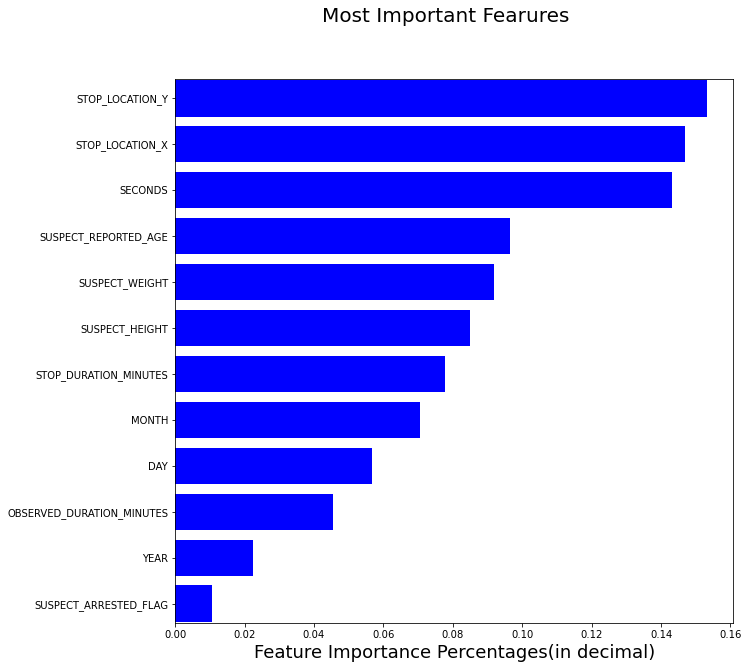

In [109]:
features = sorted(zip(X_merge.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.suptitle('Most Important Fearures', fontsize=20)
plt.xlabel('Feature Importance Percentages(in decimal)', fontsize=18)

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width, color='b')
plt.savefig('../images/reduced_features.PNG')
plt.show()

In [110]:
cols

['SUSPECT_ARRESTED_FLAG',
 'YEAR',
 'OBSERVED_DURATION_MINUTES',
 'DAY',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_WEIGHT',
 'SUSPECT_REPORTED_AGE',
 'SECONDS',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y']

In [111]:
width

[0.010543301434317127,
 0.02229888887560465,
 0.04544315533027843,
 0.05675953097704202,
 0.07063945648861128,
 0.07783037717980594,
 0.0850378649869978,
 0.09177378613624539,
 0.09644581556779167,
 0.14322008447891602,
 0.14688255879718196,
 0.1531251797472079]

In [112]:
features

[('SUSPECT_ARRESTED_FLAG', 0.010543301434317127),
 ('YEAR', 0.02229888887560465),
 ('OBSERVED_DURATION_MINUTES', 0.04544315533027843),
 ('DAY', 0.05675953097704202),
 ('MONTH', 0.07063945648861128),
 ('STOP_DURATION_MINUTES', 0.07783037717980594),
 ('SUSPECT_HEIGHT', 0.0850378649869978),
 ('SUSPECT_WEIGHT', 0.09177378613624539),
 ('SUSPECT_REPORTED_AGE', 0.09644581556779167),
 ('SECONDS', 0.14322008447891602),
 ('STOP_LOCATION_X', 0.14688255879718196),
 ('STOP_LOCATION_Y', 0.1531251797472079)]

In [113]:
selected_cols = [f[0] for f in features][-12:]
selected_cols

['SUSPECT_ARRESTED_FLAG',
 'YEAR',
 'OBSERVED_DURATION_MINUTES',
 'DAY',
 'MONTH',
 'STOP_DURATION_MINUTES',
 'SUSPECT_HEIGHT',
 'SUSPECT_WEIGHT',
 'SUSPECT_REPORTED_AGE',
 'SECONDS',
 'STOP_LOCATION_X',
 'STOP_LOCATION_Y']

In [115]:
import joblib
joblib.dump(clf, 'reduced_features_random_forest_updated.joblib')

['reduced_features_random_forest_updated.joblib']

In [116]:
# Load the model from the file
clf_from_joblib = joblib.load('reduced_features_random_forest_updated.joblib')
clf_from_joblib

RandomForestClassifier(n_estimators=200, random_state=1)

In [117]:
# Use the loaded model to make predictions
clf_from_joblib.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)